Loan approval model based on Users criteria

Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df1=pd.read_csv(r"C:\Users\KINGNICKS-DELL\Downloads\archive (1)\loan.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [4]:
df1.nunique()

age                32
gender              2
occupation         38
education_level     5
marital_status      2
income             40
credit_score       28
loan_status         2
dtype: int64

In [5]:
df1.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [6]:
df1.columns

Index(['age', 'gender', 'occupation', 'education_level', 'marital_status',
       'income', 'credit_score', 'loan_status'],
      dtype='object')

In [7]:
df1["loan_status"].value_counts()

loan_status
Approved    45
Denied      16
Name: count, dtype: int64

In [8]:
df1

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
...,...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved


In [9]:
#checking null values
df1.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [10]:
#checing duplicates
df1.duplicated().sum()

0

In [11]:
# converting non-digit feature values into digit form
df1["loan_status"]=df1["loan_status"].map({"Approved":1,"Denied":0})

In [12]:
df1["gender"]=df1["gender"].map({"Male":1,"Female":0})

In [13]:
df1["marital_status"]=df1["marital_status"].map({"Married":0,"Single":1})

In [14]:
df1

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,Engineer,Bachelor's,0,85000,720,1
1,45,0,Teacher,Master's,1,62000,680,1
2,28,1,Student,High School,1,25000,590,0
3,51,0,Manager,Bachelor's,0,105000,780,1
4,36,1,Accountant,Bachelor's,0,75000,710,1
...,...,...,...,...,...,...,...,...
56,39,1,Architect,Master's,0,100000,770,1
57,25,0,Receptionist,High School,1,32000,570,0
58,43,1,Banker,Bachelor's,0,95000,760,1
59,30,0,Writer,Master's,1,55000,650,1


In [15]:
df1.drop(columns={"occupation","education_level"},inplace=True)

In [16]:
df1

,age,gender,marital_status,income,credit_score,loan_status
0,32,1,0,85000,720,1
1,45,0,1,62000,680,1
2,28,1,1,25000,590,0
3,51,0,0,105000,780,1
4,36,1,0,75000,710,1
...,...,...,...,...,...,...
56,39,1,0,100000,770,1
57,25,0,1,32000,570,0
58,43,1,0,95000,760,1
59,30,0,1,55000,650,1


In [17]:
df1.corr()

,age,gender,marital_status,income,credit_score,loan_status
age,1.000000,-0.049218,-0.746899,0.743184,0.806042,0.648135
gender,-0.049218,1.000000,-0.281703,0.051406,0.111500,0.233413
marital_status,-0.746899,-0.281703,1.000000,-0.752035,-0.845532,-0.740370
income,0.743184,0.051406,-0.752035,1.000000,0.937983,0.699577
credit_score,0.806042,0.111500,-0.845532,0.937983,1.000000,0.820765
loan_status,0.648135,0.233413,-0.740370,0.699577,0.820765,1.000000


<Axes: >

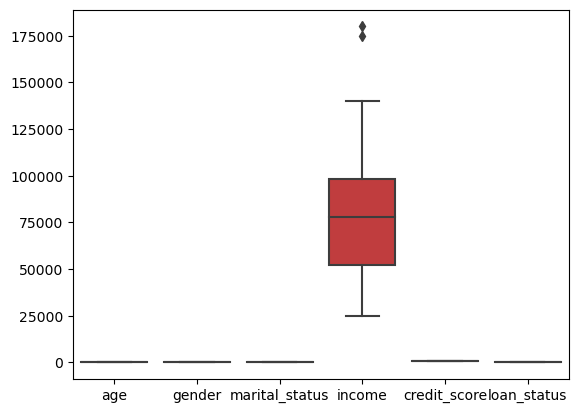

In [18]:
#for checking any outliers
sns.boxplot(df1)

In [19]:
#income containing outlier.

In [20]:
df1.describe()

,age,gender,marital_status,income,credit_score,loan_status
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,37.081967,0.508197,0.393443,78983.606557,709.836066,0.737705
std,8.424755,0.504082,0.492568,33772.025802,72.674888,0.443533
min,24.000000,0.000000,0.000000,25000.000000,560.000000,0.000000
25%,30.000000,0.000000,0.000000,52000.000000,650.000000,0.000000
50%,36.000000,1.000000,0.000000,78000.000000,720.000000,1.000000
75%,43.000000,1.000000,1.000000,98000.000000,770.000000,1.000000
max,55.000000,1.000000,1.000000,180000.000000,830.000000,1.000000


In [21]:
df1["income"].quantile([.91,.91,.92,.93,.94,.95,.96,.97,.98,.99,.90])

0.91    120000.0
0.91    120000.0
0.92    121000.0
0.93    124000.0
0.94    127000.0
0.95    130000.0
0.96    136000.0
0.97    147000.0
0.98    168000.0
0.99    177000.0
0.90    120000.0
Name: income, dtype: float64

In [22]:
final=df1.query('income<=168000.0')

<Axes: xlabel='loan_status', ylabel='income'>

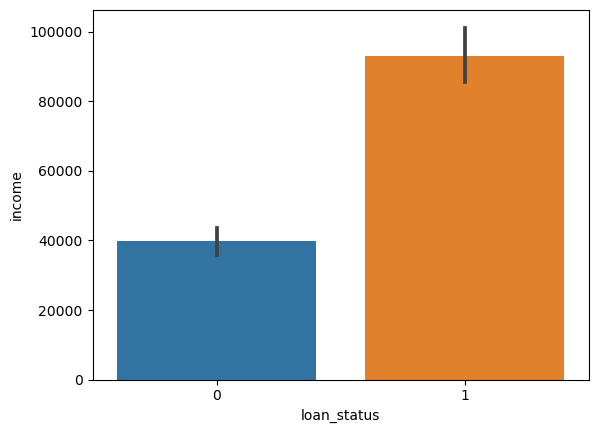

In [23]:
sns.barplot(x=df1["loan_status"],y=df1["income"])

In [24]:
final.shape

(59, 6)

In [25]:
x=df1.drop(columns="loan_status")
y=df1["loan_status"]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.80,random_state=123)

In [28]:
xtrain.shape

(48, 5)

importing algorithms

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [30]:
LR=LogisticRegression()
RDF=RandomForestClassifier()
DT=DecisionTreeClassifier()
SVC=SVC()
GB=GaussianNB()

In [31]:
LR.fit(xtrain,ytrain)

LogisticRegression()

In [32]:
print(accuracy_score(ytrain,LR.predict(xtrain)))
print(accuracy_score(ytest,LR.predict(xtest)))
print(classification_report(ytrain,LR.predict(xtrain)))

1.0
0.9230769230769231
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        35

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [33]:
DT.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [34]:
print(accuracy_score(ytrain,DT.predict(xtrain)))
print(accuracy_score(ytest,DT.predict(xtest)))
print(classification_report(ytrain,DT.predict(xtrain)))

1.0
0.8461538461538461
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        35

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [35]:
RDF.fit(xtrain,ytrain)

RandomForestClassifier()

In [36]:
print(accuracy_score(ytrain,RDF.predict(xtrain)))
print(accuracy_score(ytest,RDF.predict(xtest)))
print(classification_report(ytrain,RDF.predict(xtrain)))

1.0
0.9230769230769231
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        35

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [37]:
SVC.fit(xtrain,ytrain)

SVC()

In [38]:
print(accuracy_score(ytrain,SVC.predict(xtrain)))
print(accuracy_score(ytest,SVC.predict(xtest)))
print(classification_report(ytrain,SVC.predict(xtrain)))

0.9583333333333334
1.0
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.94      0.97        35

    accuracy                           0.96        48
   macro avg       0.93      0.97      0.95        48
weighted avg       0.96      0.96      0.96        48



In [39]:
GB.fit(xtrain,ytrain)

GaussianNB()

In [40]:
print(accuracy_score(ytrain,GB.predict(xtrain)))
print(accuracy_score(ytest,GB.predict(xtest)))
print(classification_report(ytrain,GB.predict(xtrain)))

0.9791666666666666
1.0
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.97      0.99        35

    accuracy                           0.98        48
   macro avg       0.96      0.99      0.97        48
weighted avg       0.98      0.98      0.98        48



for accuracy and precision RandomForestClassifier and DecisionTreeClassifier are best

In [41]:
final_model=RDF.fit(x,y)

In [42]:
import joblib

In [43]:
joblib.dump(final_model,"loan_prediction")

['loan_prediction']

In [44]:
model=joblib.load("loan_prediction")

In [45]:
x

,age,gender,marital_status,income,credit_score
0,32,1,0,85000,720
1,45,0,1,62000,680
2,28,1,1,25000,590
3,51,0,0,105000,780
4,36,1,0,75000,710
...,...,...,...,...,...
56,39,1,0,100000,770
57,25,0,1,32000,570
58,43,1,0,95000,760
59,30,0,1,55000,650


In [46]:
Data=pd.DataFrame({"age":25,
                  "gender":1,
                  "marital_status":1,
                  "income":35000,
                  "credit_score":500},index=[0])


In [47]:
Data

,age,gender,marital_status,income,credit_score
0,25,1,1,35000,500


In [48]:
model.predict(Data)

array([0], dtype=int64)

In [51]:
from tkinter import *
import tkinter as tkinter
import tkinter as tk
from tkinter.ttk import Combobox


In [ ]:
loan=Tk()
loan.geometry("800x600")
loan.maxsize(width=800,height=600)
loan.title("Loan_A&D_Predictor")
loan.config(bg="AntiqueWhite")
image=PhotoImage(file=r"C:\Users\KINGNICKS-DELL\Downloads\pngloan.png")
labelphoto=Label(loan,image=image).place(x=-10,y=-300)
# creating labels and entryboxes and comboboxes 
label0=Label(loan,text="Loan_A&D_Predictor",fg="black",font=("TimesNewRomans",16,"bold"),padx=True).place(x=280,y=3)
#age
label1=Label(loan,text="AGE-",fg="black",font=("TimesNewRomans",13,"bold"),padx=True).place(x=180,y=100)
label11=Label(loan,text="Years",fg="black",font=("TimesNewRomans",13,"bold"),padx=True).place(x=460,y=97)
e1=Entry(loan,bd=5,width=20,font=("TimesNewRomans",13))
e1.place(x=260,y=97)
#gender
label2=Label(loan,text="Gender-",fg="black",font=("TimesNewRomans",13,"bold"),padx=True).place(x=170,y=150)
gen=["0","1"]
combobox=Combobox(loan,value=gen)
combobox["state"]="readonly"
combobox.place(x=260,y=150)
#maritial status
label2=Label(loan,text="marital_status-",fg="black",font=("TimesNewRomans",13,"bold"),padx=True).place(x=130,y=200)
mer=["0","1"]
combobox1=Combobox(loan,value=mer)
combobox1["state"]="readonly"
combobox1.place(x=260,y=200)
#income
label2=Label(loan,text="Income-",fg="black",font=("TimesNewRomans",13,"bold"),padx=True).place(x=160,y=240)
e2=Entry(loan,bd=5,width=20,font=("TimesNewRomans",13))
e2.place(x=260,y=240)
#credit_score
label2=Label(loan,text="Credit Score-",fg="black",font=("TimesNewRomans",13,"bold"),padx=True).place(x=140,y=280)
e3=Entry(loan,bd=5,width=20,font=("TimesNewRomans",13))
e3.place(x=260,y=280)
e4=Entry(loan,width=40,bd=5,font=("TimesNewRomans",13,"bold"))
e4.place(x=230,y=320)
#function
def Prediction():
     p1=Entry.get(e1)
     p1=eval(p1)
     p2=Combobox.get(combobox)
     p2=int(p2)
     p3=Combobox.get(combobox1)
     p3=int(p3)
     p4=Entry.get(e2)
     p4=eval(p4)
     p5=Entry.get(e3)
     p5=eval(p5)
     Data1=pd.DataFrame({"age":p1,
                  "gender":p2,
                  "marital_status":p3,
                  "income":p4,
                  "credit_score":p5},index=[0])
     model=joblib.load("loan_prediction")
     prediction=model.predict(Data1)
     Entry.insert(e4,0,prediction)
     print(prediction)
def reset():
    e1.delete(0,END)
    e2.delete(0,END)
    e3.delete(0,END)
    e4.delete(0,END)
#button
button1=Button(loan,text="Submit",bd=5,bg="red",command=Prediction)
button1.place(x=250,y=400)
button2=Button(loan,text="Reset",bd=5,bg="red",command=reset)
button2.place(x=390,y=400)
label3=Label(loan,text=("Male=1,Female=0,Married=0,Single=1,Approved=1,Denied=0"),fg="black",font=("TimesNewRomans",13,"bold"),padx=True)
label3.place(x=140,y=450)
     
loan.mainloop()

[0]
